In [18]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import spacy
import pywt

model = SentenceTransformer('all-mpnet-base-v2')

In [19]:
nlp = spacy.load('en_core_web_sm')
def split_sentances(text: str):
  #text = text.replace('\n', '').replace('?', '').replace('.', '')

  # Split the string into sentences using regular expression
  return [sent.text for sent in nlp(text).sents]


def denoize(arr):
    coeffs = pywt.wavedec(arr, 'db4', level=6)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(arr)))
    coeffs = [pywt.threshold(c, threshold, 'soft') for c in coeffs]
    return pywt.waverec(coeffs, 'db4')



In [24]:
# Retrieve random body of text (paragrage)
text = "Canada is a country in North America. Its ten provinces and three territories extend from the Atlantic Ocean to the Pacific Ocean and northward into the Arctic Ocean, making it the world's second-largest country by total area, with the world's longest coastline. It is characterized by a wide range of both meteorologic and geological regions. The country is sparsely inhabited, with 95 percent of the population residing south of the 55th parallel in urban areas. Canada's capital is Ottawa and its three largest metropolitan areas are Toronto, Montreal, and Vancouver."
anchor = "Wikipedia was launched by Jimmy Wales and Larry Sanger on January 15, 2001."
anchor2 = "Sanger coined its name as a blend of wiki and encyclopedia"
# Split text into list of sentences
text = split_sentances(text)
print(text)

['Canada is a country in North America.', "Its ten provinces and three territories extend from the Atlantic Ocean to the Pacific Ocean and northward into the Arctic Ocean, making it the world's second-largest country by total area, with the world's longest coastline.", 'It is characterized by a wide range of both meteorologic and geological regions.', 'The country is sparsely inhabited, with 95 percent of the population residing south of the 55th parallel in urban areas.', "Canada's capital is Ottawa and its three largest metropolitan areas are Toronto, Montreal, and Vancouver."]


In [25]:
# Retrieve embeddings
fullTextembeddings = [model.encode(sent) for sent in text]
anchorEmbedding = model.encode(anchor)
anchorEmbedding2 = model.encode(anchor2)


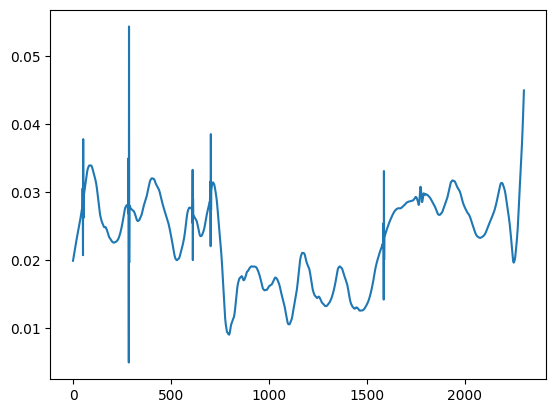

In [26]:
x = np.arange(3 * len(fullTextembeddings[0]))
emb1 = np.abs(fullTextembeddings[0] - anchorEmbedding)
emb2 = np.abs(anchorEmbedding2 - anchorEmbedding) 
emb3 = np.abs(fullTextembeddings[2] - anchorEmbedding) 

main = np.append(emb1, emb2)
main = np.append(main, emb3)

val = denoize(main)
plt.plot(x, val)

Canada is a country in North America. Sanger coined its name as a blend of wiki and encyclopedia It is characterized by a wide range of both meteorologic and geological regions.
(768,)


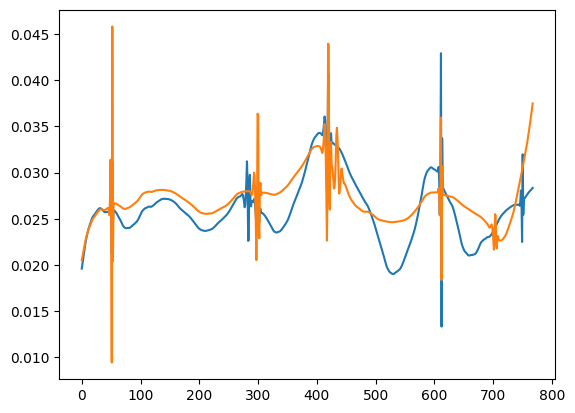

In [33]:
testing = text[0] + " " + anchor2 + " " + text[2]
testing2 = text[0] + " " + text[1] + " " + text[2]

print(testing)
fullTextEmbeddings = model.encode(testing)
fullTextEmbeddings2 = model.encode(testing2)

print(fullTextEmbeddings.shape)
x = np.arange(len(fullTextEmbeddings))

plt.plot(x, denoize(np.abs(fullTextEmbeddings - anchorEmbedding)))
plt.plot(x, denoize(np.abs(fullTextEmbeddings2 - anchorEmbedding)))
